Mengimport library python yang diperlukan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Menampilkan 5 data teratas

In [ ]:
df = pd.read_csv('/content/sample_data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Melihat informasi tipe data

In [ ]:
#Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8154 non-null   object
 1   type          8154 non-null   object
 2   title         8154 non-null   object
 3   director      5636 non-null   object
 4   cast          7407 non-null   object
 5   country       7351 non-null   object
 6   date_added    8145 non-null   object
 7   release_year  8154 non-null   int64 
 8   rating        8150 non-null   object
 9   duration      8150 non-null   object
 10  listed_in     8153 non-null   object
 11  description   8153 non-null   object
dtypes: int64(1), object(11)
memory usage: 764.6+ KB


mengfilter film dengan type ditentukan

In [ ]:
#EDA(Exploratory Data Analysis)
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

# Ratings

Dengan countplot rating ini dapat diketahui bahwa konten TV-MA (Mature Audiences) memiliki angka rating tertinggi.

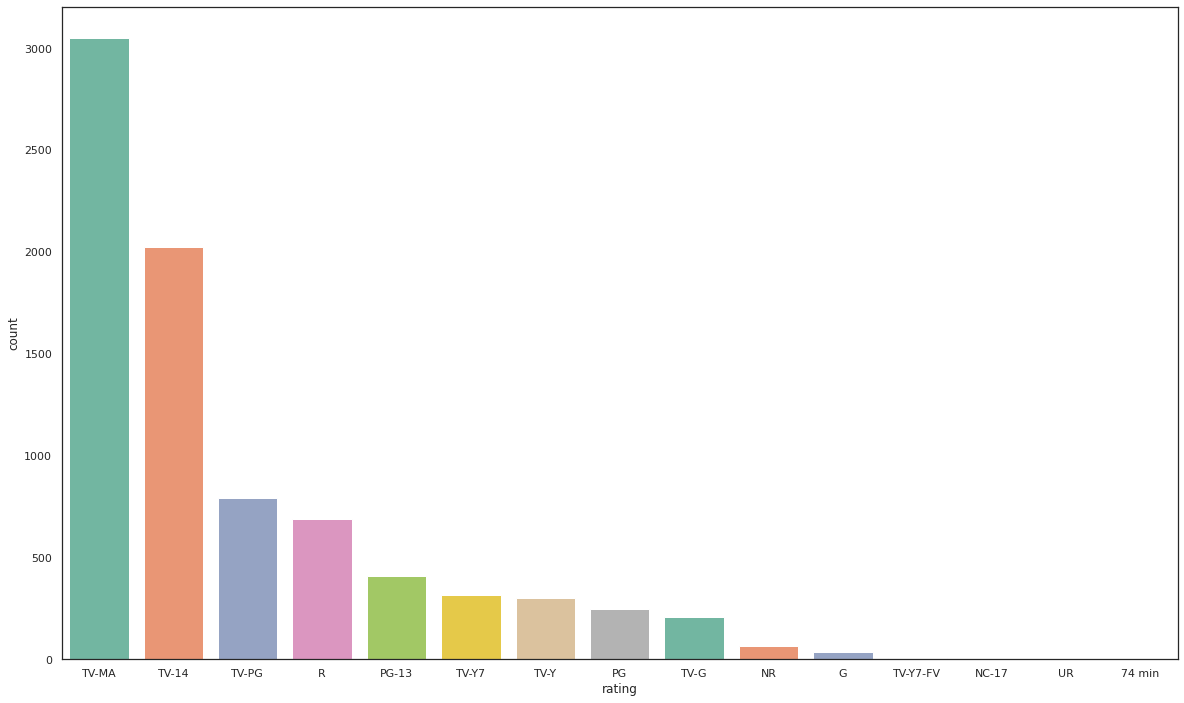

In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="white")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])

# Year

Plot ini menunjukkan bahwa sebagian besar konten diproduksi pada tahun 2018 dan 2017. Fakta yang menarik adalah pada tahun 2019, 2020 dan 2021 jumlah konten yang diproduksi sedikit. Ini sebagian besar karena pandemi Covid-19

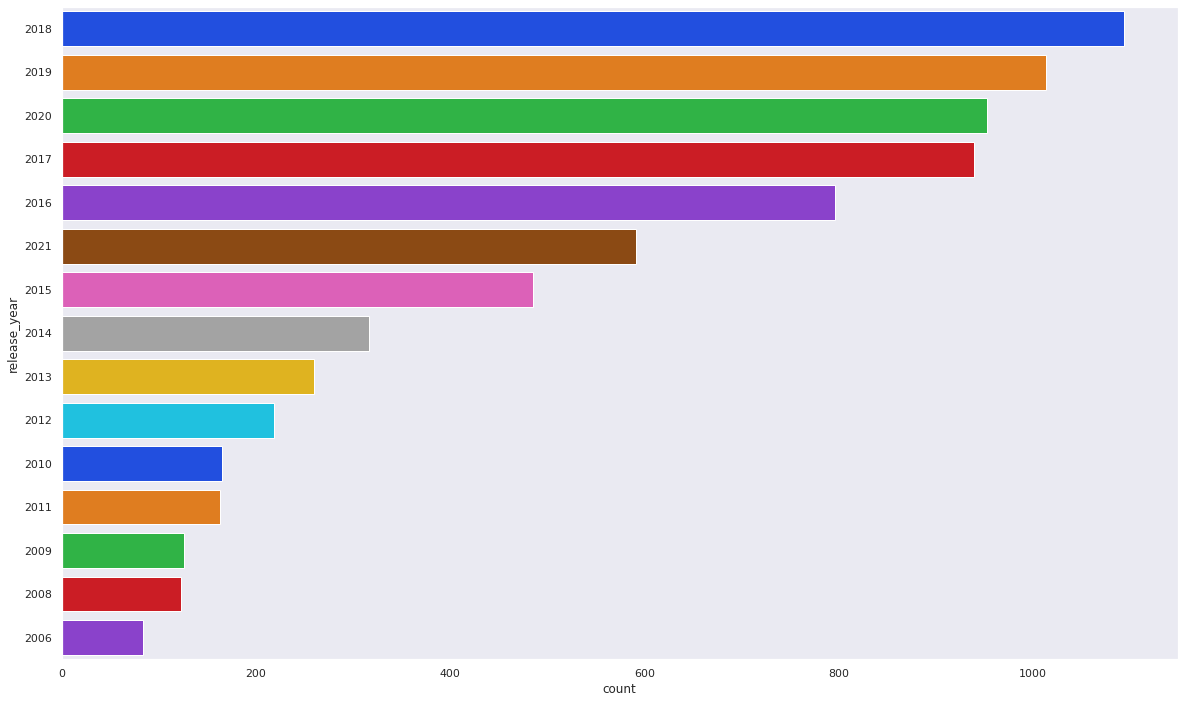

In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="dark")
ax = sns.countplot(y="release_year", data=df, palette="bright", order=df['release_year'].value_counts().index[0:15])

kita hanya membutuhkan dua form kolom di atas dataset untuk membangun sistem rekomendasi

In [ ]:
#Title & Description
df[['title','description']]

,title,description
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,Blood & Water,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,In a city of coaching centers known to train I...
...,...,...
8149,Tamanchey,A man and a woman on the run from the law are ...
8150,Tarif de nuit,A night out in Paris quickly unravels when two...
8151,Tarzan,"After being shipwrecked off the African coast,..."
8152,Tarzan 2,How did the King of the Jungle ascend to the t...


Cosine similarity digunakan karena tidak bergantung pada besarnya dan relatif mudah dan cepat untuk dihitung

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
netflix_data = df.copy()
tfidf = TfidfVectorizer(stop_words='english')
netflix_data['description'] = netflix_data['description'].fillna('')
tfidf_matrix=tfidf.fit_transform(netflix_data['description'])

In [ ]:
#Cosine similarity score probability calculation
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.06993539, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06993539, ..., 1.        , 0.14089234,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14089234, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
indices=pd.Series(netflix_data.index,index=netflix_data['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Tamanchey                8149
Tarif de nuit            8150
Tarzan                   8151
Tarzan 2                 8152
Tattah                   8153
Length: 8154, dtype: int64

Sistem Rekomendasi menggunakan cosine similarity

Skor yang mendekati film yang dipilih tercantum dalam yop 10 film rekomendasi

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data[['title','description']].iloc[movie_indices]

In [ ]:
get_recommendations('Save Me')

,title,description
4510,Apostle,"In 1905, a drifter on a dangerous mission to r..."
7994,Shakti: The Power,A young mother must break free of the clutches...
6985,Holy Hell,An ex-member charts his path from idealism to ...
4713,Baaghi,A martial artist faces his biggest test when h...
155,Labyrinth,"In Jim Henson's fantasy, teen Sarah embarks on..."
5,Midnight Mass,The arrival of a charismatic young priest brin...
7497,Monster High: Great Scarrier Reef,"At a Monster High party, Lagoona and pals are ..."
1052,The Master,A heavy-drinking loner finds some semblance of...
8074,Spy Kids,The tables are turned when pint-sized kids Car...
4980,Wild Wild Country,When a controversial cult leader builds a utop...
